In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("breast-cancer-data.csv")

In [4]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [7]:
data = df.drop(['diagnosis','id'], axis=1)

In [8]:
df.shape

(569, 32)

In [9]:
target = df['diagnosis']

In [10]:
data.shape

(569, 30)

In [11]:
target.shape

(569,)

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [13]:
le = LabelEncoder()
scaler = StandardScaler()

In [14]:
le.fit(df['diagnosis'])

LabelEncoder()

In [15]:
target_Encoded = le.transform(df['diagnosis'])

In [16]:
target_Encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [17]:
np.unique(target_Encoded)

array([0, 1])

In [18]:
scaler.fit(data)

StandardScaler()

In [19]:
data_scaled = scaler.transform(data)

In [20]:
scaler.mean_

array([1.41272917e+01, 1.92896485e+01, 9.19690334e+01, 6.54889104e+02,
       9.63602812e-02, 1.04340984e-01, 8.87993158e-02, 4.89191459e-02,
       1.81161863e-01, 6.27976098e-02, 4.05172056e-01, 1.21685343e+00,
       2.86605923e+00, 4.03370791e+01, 7.04097891e-03, 2.54781388e-02,
       3.18937163e-02, 1.17961371e-02, 2.05422988e-02, 3.79490387e-03,
       1.62691898e+01, 2.56772232e+01, 1.07261213e+02, 8.80583128e+02,
       1.32368594e-01, 2.54265044e-01, 2.72188483e-01, 1.14606223e-01,
       2.90075571e-01, 8.39458172e-02])

In [21]:
data_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [22]:
from sklearn.decomposition import PCA

In [23]:
sklearn_PCA = PCA(n_components=2)

In [24]:
sklearn_PCA.fit(data_scaled)

PCA(n_components=2)

In [25]:
data_scaled_PCA = sklearn_PCA.transform(data_scaled)

In [26]:
data_scaled_PCA.shape

(569, 2)

In [27]:
target_Encoded.shape

(569,)

In [28]:
sklearn_PCA.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [29]:
df_PCA = pd.DataFrame(data = data_scaled_PCA, columns = ['PC1', 'PC2'])

target_PCA = pd.Series(target_Encoded, name='target')

result_df = pd.concat([df_PCA, target_PCA], axis=1)
result_df.head(5)

,PC1,PC2,target
0,9.192837,1.948583,1
1,2.387802,-3.768172,1
2,5.733896,-1.075174,1
3,7.122953,10.275589,1
4,3.935302,-1.948072,1


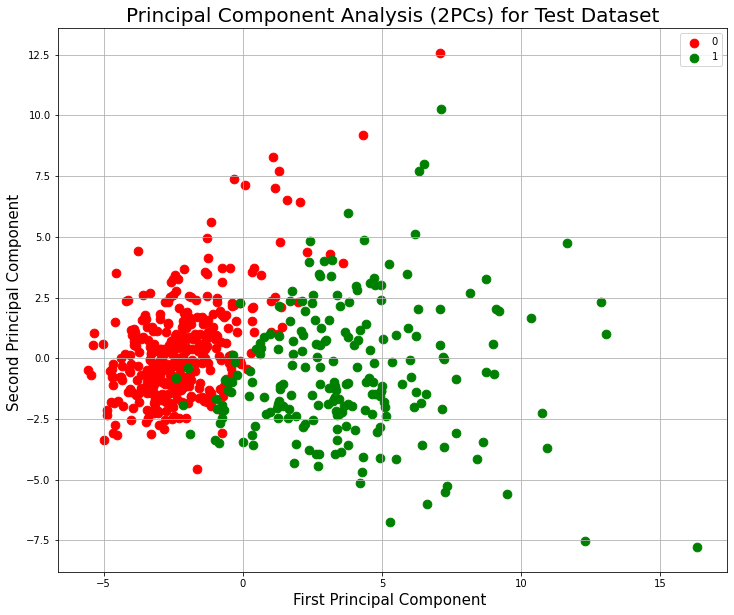

In [30]:
# Visualize Principal Components with a scatter plot
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Principal Component ', fontsize = 15)
ax.set_ylabel('Second Principal Component ', fontsize = 15)
ax.set_title('Principal Component Analysis (2PCs) for Test Dataset', fontsize = 20)

targets = np.unique(target_Encoded)
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = target_Encoded == target
    ax.scatter(result_df.loc[indicesToKeep, 'PC1'], 
               result_df.loc[indicesToKeep, 'PC2'], 
               c = color, 
               s = 75)
ax.legend(targets)
ax.grid()

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(result_df.drop(['target'], axis=1), target_Encoded, random_state=42, train_size=0.7 )

In [32]:
X_train.shape , y_train.shape , X_test.shape, y_test.shape

((398, 2), (398,), (171, 2), (171,))

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
Logi1_LM = LogisticRegression()

In [35]:
Logi1_LM.fit(X_train,y_train)

LogisticRegression()

In [36]:
Pred1 = Logi1_LM.predict(X_test)

In [37]:
Pred1

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test,Pred1))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [40]:
sklearn_PCA2 = PCA(n_components=3)

In [41]:
sklearn_PCA2.fit(data_scaled)

PCA(n_components=3)

In [42]:
data_scaled_PCA2 = sklearn_PCA2.transform(data_scaled)

In [43]:
sklearn_PCA2.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163])

In [44]:
df_PCA2 = pd.DataFrame(data = data_scaled_PCA2, columns = ['PC1', 'PC2','PC3'])

target_PCA = pd.Series(target_Encoded, name='target')

result_df2 = pd.concat([df_PCA2, target_PCA], axis=1)
result_df2.head(5)

,PC1,PC2,PC3,target
0,9.192837,1.948583,-1.123167,1
1,2.387802,-3.768172,-0.529293,1
2,5.733896,-1.075174,-0.551748,1
3,7.122953,10.275589,-3.232790,1
4,3.935302,-1.948072,1.389767,1


In [45]:
np.random.seed(19680801)

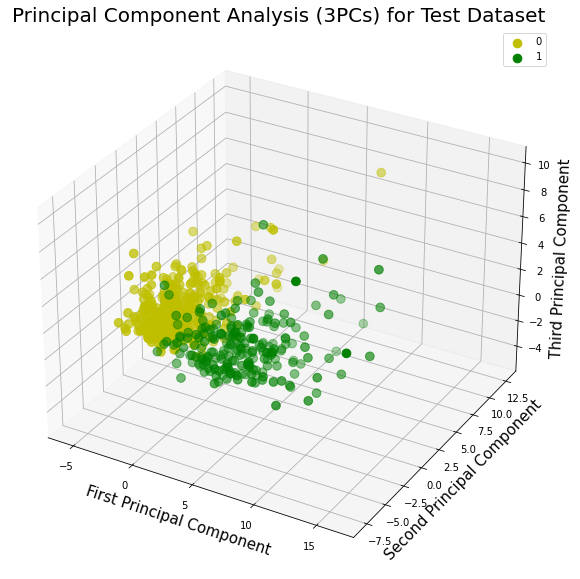

In [46]:
fig2 = plt.figure(figsize = (12,10))
ax2 = fig2.add_subplot(projection='3d')
ax2.set_xlabel('First Principal Component ', fontsize = 15)
ax2.set_ylabel('Second Principal Component ', fontsize = 15)
ax2.set_zlabel('Third Principal Component ', fontsize = 15)
ax2.set_title('Principal Component Analysis (3PCs) for Test Dataset', fontsize = 20)

targets = np.unique(target_Encoded)
colors = ['y', 'g']

for target, color in zip(targets, colors):
    indicesToKeep = target_Encoded == target
    ax2.scatter3D(result_df2.loc[indicesToKeep, 'PC1'], 
               result_df2.loc[indicesToKeep, 'PC2'],
               result_df2.loc[indicesToKeep, 'PC3'],
               c = color, 
               s = 75)
ax2.legend(targets)
ax2.grid()


In [47]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(result_df2.drop(['target'], axis=1), target_Encoded, random_state=42, train_size=0.7 )

In [48]:
X_train2.shape , y_train2.shape , X_test2.shape, y_test2.shape

((398, 3), (398,), (171, 3), (171,))

In [49]:
Logi2_LM = LogisticRegression()

In [50]:
Logi2_LM.fit(X_train2,y_train2)

LogisticRegression()

In [52]:
Pred2 = Logi2_LM.predict(X_test2)

In [53]:
print(classification_report(y_test,Pred2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [54]:
le.inverse_transform(Pred2)

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

In [ ]:
jupyter nbconvert --to webpdf --allow-chromium-download Simplifying_Cancer_Treatment_PCA_LDA_Assignment.ipynb